<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/imnarae/tp2_da_imnarae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# click_stream_df

In [2]:
click_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/click_stream_new.csv')
click_df

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
745583,e1160f45-046d-43a7-a9e0-0233132fa94c,SEARCH,2022-06-08T13:56:21.799901Z,451d9ef9-ce48-4a79-a94c-75f737ec9760,MOBILE,NaN,NaN,NaN,NaN,Thrift,NaN,NaN
745584,e1160f45-046d-43a7-a9e0-0233132fa94c,SCROLL,2022-06-08T22:34:31.799901Z,63c1722e-e741-488f-a403-fa592d4037e3,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745585,e1160f45-046d-43a7-a9e0-0233132fa94c,SEARCH,2022-06-09T07:05:06.799901Z,dff523ba-09e0-4b58-af59-3694663e4f1b,MOBILE,NaN,NaN,NaN,NaN,Tas Kerja,NaN,NaN
745586,e1160f45-046d-43a7-a9e0-0233132fa94c,SEARCH,2022-06-09T15:42:03.799901Z,4b92b6b5-87d5-40f7-aba1-f6b4f626da62,MOBILE,NaN,NaN,NaN,NaN,Kaos,NaN,NaN


In [3]:
click_df.columns


Index(['                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 session_id',
       'event_name', 'event_time', 'event_id', 'traffic_source', 'product_id',
       'quantity', 'item_price', 'payment_status', 'search_keywords',
       'promo_code', 'promo_amount'],
      dtype='object')

In [4]:
click_df['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE', nan],
      dtype=object)

# customer_df

In [5]:
customer_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/customer.csv')
customer_df.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

# transation_df

**< transation_df 컬럼 안내 >**<p>
created_at: 거래 발생 시간<br>
customer_id: 주문고객의 고유 식별자<br>
booking_id: 각 주문에 할당된 고유 식별자(한 고객이 여러 상품을 주문한 경우에도 각 주문은 별도의 booking_id를 가짐)<br>
session_id: 고객의 웹사이트 방문 세션(여러 주문이 같은 세션에서 발생했다면,  고객이 한 번의 웹사이트 방문 중에 여러 상품을 구매한 것)<br>
payment_method: 고객의 결제방법 (신용카드,  PayPal 등)<br>
payment_status: 결제 상태<br>
promo_amount: 주문에서 사용된 프로모션 또는 할인액<br>
promo_code: 사용한 프로모션 코드<br>
shipment_fee: 배송비<br>
shipment_date_limit: 상품이 배송되어야 하는 최종 날짜<br>
shipment_location_lat, shipment_location_long: 배송지의 위도와 경도<br>
total_amount: 주문 총 금액<br>
product_id: 주문된 제품의 고유 식별자<br>
quantity: 주문된 제품 수량<br>
item_price: 각 개별 제품 가격

In [7]:
transation_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/transaction_new.csv')
transation_df

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [55]:
transation_df['promo_code'].value_counts()

AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
Name: promo_code, dtype: int64

In [54]:
transation_df['payment_status'].value_counts()

Success    1201035
Failed       53550
Name: payment_status, dtype: int64

# product_df(상품 카테코리 별 매출 비중 확인(Product 관점))

**< product_df 컬럼 안내 >**<p>
id : 제품의 고유id (transation 데이터의 product_id 와 연결) <br>
gender : 제품의 타겟 성별<br>
masterCategory : 주 카테고리<br>
subCategory	: 부 카테고리<br>
articleType	: 세부유형(바지 중에서도 "청바지,슬랙스.." 이런식의 세부유형)<br>
baseColour	: 제품의 기본 색상<br>
season	: 출시 또는 판매 계절<br>
year	: 출시 연도<br>
usage	: 제품의 사용목적 또는 분야<br>
productDisplayName : 제품 표시 이름

In [8]:
product_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/product.csv')
product_df


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [9]:
product_df['id'].value_counts()

15970    1
58859    1
12881    1
22628    1
15298    1
        ..
44441    1
45593    1
36061    1
52524    1
51623    1
Name: id, Length: 44446, dtype: int64

In [10]:
product_df['gender'].value_counts()

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64

In [11]:
product_df['masterCategory'].value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [12]:
product_df['subCategory'].value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [13]:
product_df['articleType'].value_counts()

Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 143, dtype: int64

In [14]:
product_df['baseColour'].value_counts()

Black                9732
White                5540
Blue                 4922
Brown                3494
Grey                 2741
Red                  2458
Green                2116
Pink                 1861
Navy Blue            1791
Purple               1643
Silver               1090
Yellow                779
Beige                 749
Gold                  629
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

In [15]:
product_df['season'].value_counts()

Summer    21476
Fall      11445
Winter     8519
Spring     2985
Name: season, dtype: int64

In [16]:
product_df['usage'].value_counts()

Casual          34414
Sports           4025
Ethnic           3208
Formal           2359
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

In [17]:
product_df['productDisplayName'].value_counts()

Lucera Women Silver Earrings                       82
Lucera Women Silver Pendant                        56
Lucera Women Silver Ring                           50
Catwalk Women Black Heels                          48
Q&Q Men Black Dial Watch                           42
                                                   ..
Spykar Men Navy Blue Trevor Brief                   1
Nike Mens White Polo T-shirt                        1
Belmonte Men Solid Blue Shirts                      1
Puma Men's Toe Crusher Black T-shirt                1
Fossil Women Pink Dial Chronograph Watch ES3050     1
Name: productDisplayName, Length: 31136, dtype: int64

In [18]:
product_df['year'].value_counts() # year : 제품생산(출시)연도로 가정, 제품 많은 순

2012.0    16290
2011.0    13689
2016.0     6007
2017.0     2917
2015.0     2780
2013.0     1213
2010.0      846
2018.0      405
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: year, dtype: int64

In [19]:
product_df['year'].value_counts().sort_index()# year : 제품생산(출시)연도로 가정, 연도 순

2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13689
2012.0    16290
2013.0     1213
2014.0      236
2015.0     2780
2016.0     6007
2017.0     2917
2018.0      405
2019.0       33
Name: year, dtype: int64

In [20]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [21]:
# 여기서 year 컬럼을 int로 바꾸려 하니, 1개의 nan값으로 인해 불가

In [22]:
product_df.describe()

,id,year
count,44446.000000,44445.000000
mean,29692.631350,2012.805940
std,17048.234982,2.126401
min,1163.000000,2007.000000
25%,14770.250000,2011.000000
50%,28609.500000,2012.000000
75%,44678.750000,2015.000000
max,60000.000000,2019.000000


In [23]:
# 결측치 확인
product_df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [24]:
product_df['year'][product_df['year'].isnull()]

21285   NaN
Name: year, dtype: float64

In [25]:
product_df.loc[21285]

id                                                     53781
gender                                                   Men
masterCategory                                       Apparel
subCategory                                          Topwear
articleType                                          Tshirts
baseColour                                              Blue
season                                                   NaN
year                                                     NaN
usage                                                 Sports
productDisplayName    Puma Men Blue Sless Round Neck T-shirt
Name: 21285, dtype: object

In [26]:
#product_df['year'].astype(int)

In [27]:
product_df.rename(columns={'id': 'product_id'}, inplace=True)


# transation,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transation_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 상품 카테고리별 매출액 총합 .
category_sales = trans_prod_df.groupby(['masterCategory', 'subCategory'])['sales'].sum().reset_index()

trans_prod_df #병합프레임확인

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,sales
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,191247
1,2021-01-15T19:52:40.793729Z,82831,81f60282-96c5-45f5-8a24-18e8111ccd08,c7d4a5a2-362b-4042-a971-a55f84e0619f,OVO,Success,0,NaN,10000,2021-01-18T16:37:55.894009Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,222512
2,2020-06-04T14:54:13.726119Z,47013,a144e124-1ad6-425b-9f64-b01f05c697ff,141a3f3b-360e-4489-bc10-91528e9e1139,Gopay,Success,0,NaN,10000,2020-06-09T17:53:51.385567Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,245159
3,2019-02-05T08:29:50.613535Z,17135,e620a19d-982d-4fc2-9715-29fda7f42269,aadf43f6-59be-4b2f-9338-ccec0b2abf40,Credit Card,Success,0,NaN,0,2019-02-07T23:03:17.353912Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,263371
4,2020-11-04T14:20:44.351064Z,70185,bbe1053a-9738-4438-bea4-0a3abcaf6afb,ae213ea2-c5bb-45aa-8a27-820d33c873aa,Gopay,Success,0,NaN,10000,2020-11-09T16:53:37.994163Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,2403496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-01-15T14:09:04.388337Z,9486,a48ea0d8-617a-4ee0-9f4a-49c5ef9cf39a,848ef48a-d693-4677-bde7-8e7664c62319,Credit Card,Success,2179,AZ2022,10000,2021-01-19T16:21:12.504685Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,206624
1254581,2017-12-18T22:39:03.425067Z,30710,9a1520a1-a1c6-497e-93b5-7c8d87aa6f33,381feb63-e5ac-4cb4-823d-c7f1547c1be9,Gopay,Success,0,NaN,10000,2017-12-23T03:51:53.957263Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,370358
1254582,2022-03-14T22:04:05.857842Z,86532,ffa8ca45-82f3-4c62-85cc-c303c805590e,97c71ce8-e94c-4cf2-948a-1c80d871ed4d,Credit Card,Success,11957,XX2022,10000,2022-03-18T15:43:22.155994Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,217452
1254583,2020-09-11T01:57:40.983766Z,83374,a4b105ee-4dd6-4b32-9412-2e092e5bcda1,c98e89d1-5b19-456b-ab53-a7da4962a290,Credit Card,Success,0,NaN,10000,2020-09-16T02:36:59.288888Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,444310


In [28]:
trans_prod_df['promo_code'].value_counts()

AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
Name: promo_code, dtype: int64

In [29]:
trans_prod_df['promo_code'].isna().value_counts()

True     773446
False    481139
Name: promo_code, dtype: int64

In [30]:
category_sales

,masterCategory,subCategory,sales
0,Accessories,Accessories,1484400001
1,Accessories,Bags,31947975167
2,Accessories,Belts,8507021121
3,Accessories,Cufflinks,1061167155
4,Accessories,Eyewear,11175937421
5,Accessories,Gloves,210814581
6,Accessories,Headwear,3134153428
7,Accessories,Jewellery,11316396781
8,Accessories,Mufflers,372670021
9,Accessories,Perfumes,9710740


In [31]:
# 'created_at' 컬럼 datetime 형태로 변환
trans_prod_df['created_at'] = pd.to_datetime(trans_prod_df['created_at'])

# 월별 매출 확인을 위해 월별로 그룹화('created_at'에서 연도와 월만 추출)
trans_prod_df['month'] = trans_prod_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()
category_sales

<ipython-input-31-f3bf68267491>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trans_prod_df['month'] = trans_prod_df['created_at'].dt.to_period('M')


,month,masterCategory,subCategory,sales
0,2016-06,Apparel,Topwear,630795
1,2016-07,Accessories,Accessories,753086
2,2016-07,Accessories,Bags,14839440
3,2016-07,Accessories,Belts,1884556
4,2016-07,Accessories,Cufflinks,191523
...,...,...,...,...
3082,2022-07,Personal Care,Nails,121952656
3083,2022-07,Personal Care,Skin,19002037
3084,2022-07,Personal Care,Skin Care,19659991
3085,2022-07,Sporting Goods,Sports Equipment,4338441


In [32]:
# 'created_at' 컬럼을 datetime 형태로 변환
transation_df['created_at'] = pd.to_datetime(transation_df['created_at'])
transation_df
# 월별 그룹화. 각 행의 'created_at' 값에서 연도와 월만 추출
transation_df['month'] = transation_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()


<ipython-input-32-4deb46e6cdad>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transation_df['month'] = transation_df['created_at'].dt.to_period('M')


In [33]:
category_sales['subCategory'].value_counts()

Socks                       136
Topwear                      74
Dress                        73
Skin                         73
Nails                        73
Makeup                       73
Lips                         73
Fragrance                    73
Accessories                  73
Shoes                        73
Sandal                       73
Flip Flops                   73
Saree                        73
Loungewear and Nightwear     73
Innerwear                    73
Free Gifts                   73
Bottomwear                   73
Headwear                     73
Watches                      73
Bags                         73
Cufflinks                    73
Eyewear                      73
Belts                        73
Jewellery                    73
Scarves                      73
Stoles                       73
Ties                         73
Wallets                      73
Skin Care                    72
Perfumes                     72
Apparel Set                  71
Mufflers

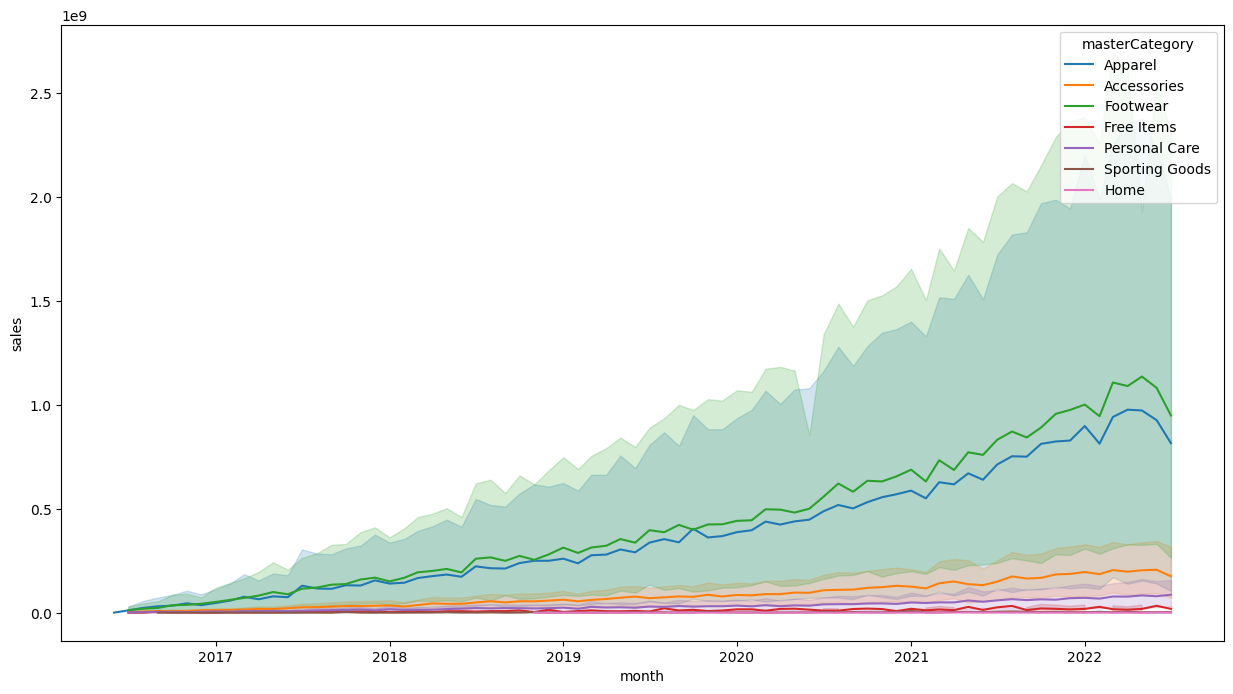

In [34]:

category_sales['month'] = category_sales['month'].dt.to_timestamp()


plt.figure(figsize=(15, 8))


sns.lineplot(data=category_sales, x='month', y='sales', hue='masterCategory')


plt.show()



In [35]:
print(category_sales['month'].dtypes)
print(category_sales['sales'].dtypes)
print(category_sales['masterCategory'].dtypes)


datetime64[ns]
int64
object


In [36]:
# 성별(제품군)에 따른 상품판매량 및 매출 
product_df.rename(columns={'id': 'product_id'}, inplace=True)
# transation,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transation_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 성별(제품군)에 따른 매출액 및 판매횟수 총합 .
gender_sales = trans_prod_df.groupby('gender').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
gender_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

gender_product_cnt = product_df['gender'].value_counts().reset_index()
gender_product_cnt.columns = ['gender', 'product_count']

# 'gender_sales' 데이터프레임에 'product_count'를 병합
gender_sales = pd.merge(gender_sales, gender_product_cnt, on='gender')
gender_sales

# 성별, 총 판매액, 총 판매 횟수, 등록된 제품 수 

,gender,total_sales,sales_count,product_count
0,Boys,8708916491,23543,830
1,Girls,6635897551,18284,655
2,Men,231170204375,625224,22165
3,Unisex,22406211396,60610,2164
4,Women,193834865342,526924,18632


In [37]:
# 계절(제품군)에 따른 매출액 및 판매횟수 총합 .
seaason_sales = trans_prod_df.groupby('season').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
seaason_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

season_product_cnt = product_df['season'].value_counts().reset_index()
season_product_cnt.columns = ['season', 'product_count']

# 'season_sales' 데이터프레임에 'product_count'를 병합
seaason_sales = pd.merge(seaason_sales, season_product_cnt, on='season')
seaason_sales

# 계절, 총 판매액, 총 판매 횟수, 등록된 제품 수 

,season,total_sales,sales_count,product_count
0,Fall,118983392307,322237,11445
1,Spring,31013170952,84368,2985
2,Summer,223802235690,606432,21476
3,Winter,88736919265,240945,8519


<ipython-input-38-054ca2e86732>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transation_df['month'] = transation_df['created_at'].dt.to_period('M')


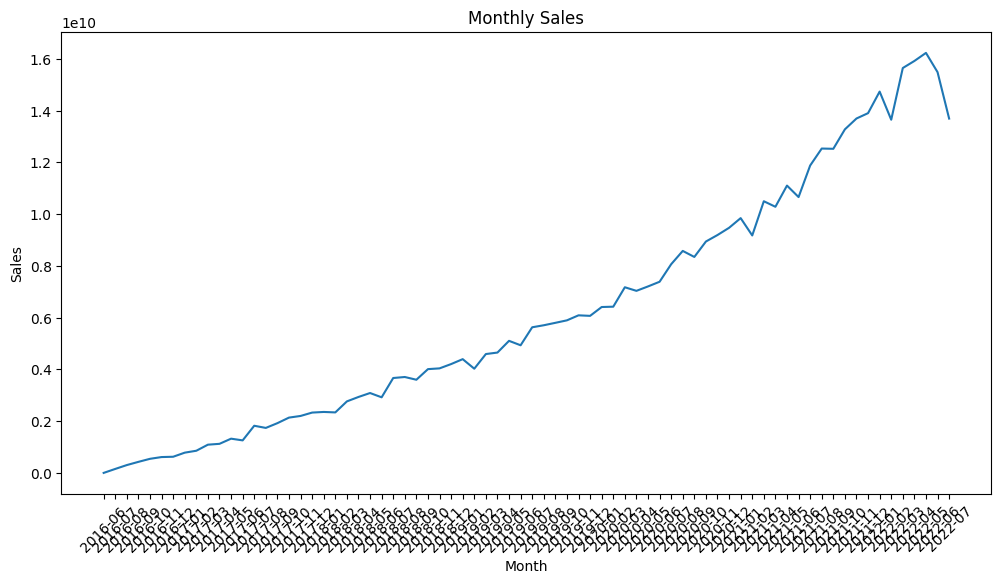

In [38]:
# 월별 매출

# 'created_at' 컬럼 datetime 변환
transation_df['created_at'] = pd.to_datetime(transation_df['created_at'])

# 월 추출
transation_df['month'] = transation_df['created_at'].dt.to_period('M')

# 각 상품 매출액
transation_df['sales'] = transation_df['item_price'] * transation_df['quantity']

# 월별 매출액
monthly_sales = transation_df.groupby('month')['sales'].sum().reset_index()
monthly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-39-83c15df22d0e>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transation_df['year'] = transation_df['created_at'].dt.to_period('Y')


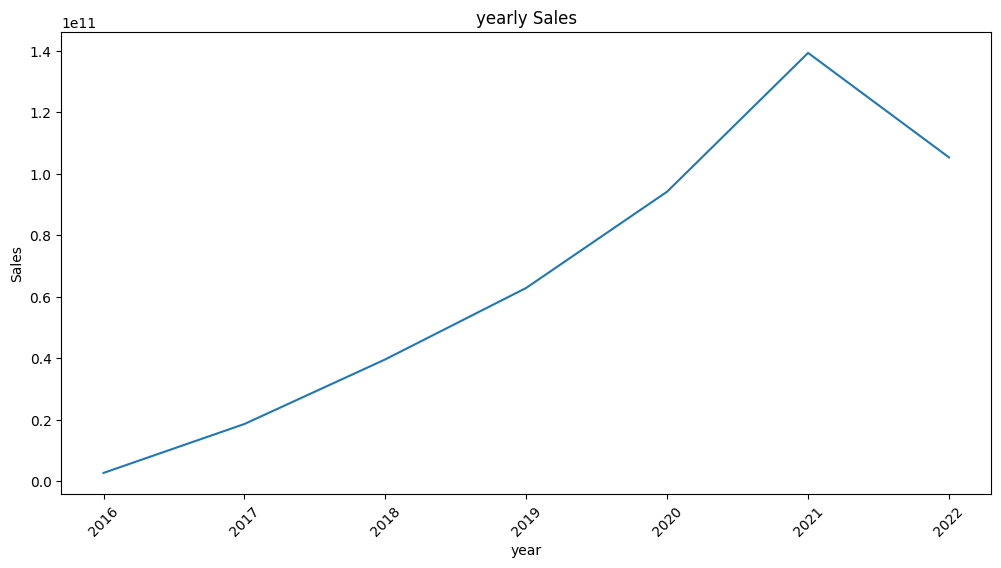

In [39]:
# 연도별 매출

# 'created_at' 컬럼 datetime 변환
transation_df['created_at'] = pd.to_datetime(transation_df['created_at'])

# 연도 추출
transation_df['year'] = transation_df['created_at'].dt.to_period('Y')

# 각 상품 매출액
transation_df['sales'] = transation_df['item_price'] * transation_df['quantity']

# 연도별 매출액
yearly_sales = transation_df.groupby('year')['sales'].sum().reset_index()
yearly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year'].astype(str), yearly_sales['sales'])
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('yearly Sales')
plt.xticks(rotation=45)
plt.show()

In [40]:
pd.set_option('display.max_rows', None)

In [50]:
# 나이(출생연도)에 따른 제품 구매 추이

# 'birthdate' 컬럼 datetime 변환
customer_df['birthdate'] = customer_df['birthdate'].astype(str)
customer_df['birthdate'] = pd.to_datetime(customer_df['birthdate'], errors='coerce')

# 연도 추출
customer_df['year'] = customer_df['birthdate'].dt.year

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transation_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = trans_cust_df['item_price'] * trans_cust_df['quantity']

# 나이(출생연도)에 따른 매출액 및 판매횟수 총합 .
age_sales = trans_cust_df.groupby('year_y').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

age_sales


# 출생연도, 총 판매액, 총 판매 횟수

,year_y,total_sales,sales_count
0,1954,3475621,12
1,1955,8390392,20
2,1957,9437562,20
3,1959,762196,4
4,1960,5703343,15
5,1961,4105001,13
6,1962,6573519,19
7,1963,55171476,171
8,1964,9425402,10
9,1965,39360772,115


In [49]:
trans_cust_df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2000
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996


In [51]:
age_sales.describe()

,year_y,total_sales,sales_count
count,61.000000,6.100000e+01,61.000000
mean,1985.918033,7.586165e+09,20566.967213
std,17.893477,9.134113e+09,24764.593160
min,1954.000000,7.621960e+05,4.000000
25%,1971.000000,1.163119e+08,342.000000
50%,1986.000000,2.142914e+09,5693.000000
75%,2001.000000,1.483570e+10,39980.000000
max,2016.000000,2.623339e+10,71272.000000


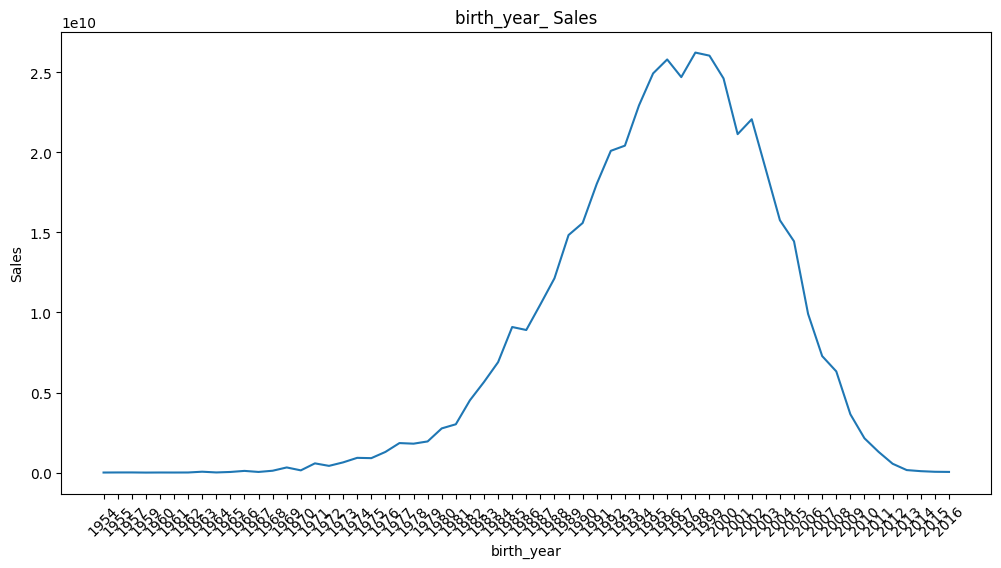

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(age_sales['year_y'].astype(str), age_sales['total_sales'])
plt.xlabel('birth_year')
plt.ylabel('Sales')
plt.title('birth_year_ Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
1984년생 나이 : 40 >39
1987년생 나이 : 35>34
2009년생 나이 : 15